<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABD/blob/main/%D0%93%D0%90_%D0%BE%D0%B1%D1%8B%D1%87%D0%BD%D0%B0%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

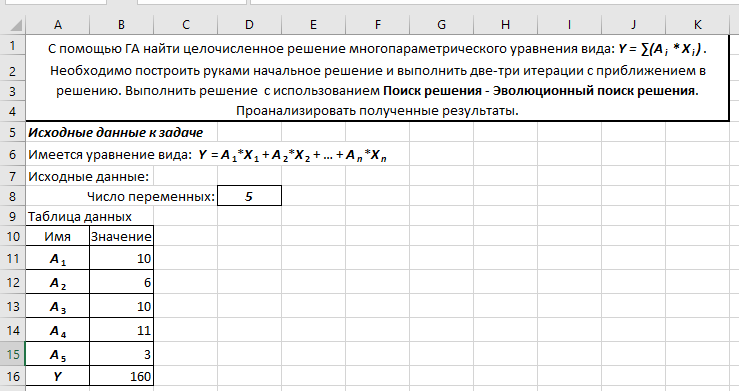

In [5]:
import random
import numpy as np

# Исходные данные
A_values = [10, 6, 10, 11, 3]
Y_target = 160

n_vars = 5

# Начальное решение
X = [4, 5, 4, 4, 5]
print(f"Начальное решение: {X}")
print(f"Значение Y: {sum(Ai * Xi for Ai, Xi in zip(A_values, X))}")


# Функция приспособленности
def fitness_function(solution):
    Y = sum(A_values[i] * solution[i] for i in range(len(solution)))
    return abs(Y - Y_target)

# Создание начальной популяции
def create_initial_population(population_size, num_variables):
    population = []
    for _ in range(population_size):
        solution = [random.randint(0, Y_target // A_values[i]) for i in range(num_variables)]
        population.append(solution)
    return population

# Оператор кроссовера
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Оператор мутации
def mutate(solution, mutation_rate):
    mutated_solution = solution[:]
    for i in range(len(mutated_solution)):
        if random.random() < mutation_rate:
            mutated_solution[i] = random.randint(0, Y_target // A_values[i])
    return mutated_solution

# Генетический алгоритм
def genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate):
    num_variables = len(A_values)
    population = create_initial_population(population_size, num_variables)
    for generation in range(num_generations):
        # Вычисление приспособленности для каждого решения
        fitness_scores = [fitness_function(solution) for solution in population]
        # Выбор лучших решений
        sorted_population = [solution for _, solution in sorted(zip(fitness_scores, population))]
        best_solution = sorted_population[0]
        best_fitness = fitness_scores[0]
        print(f"Поколение {generation + 1}, Лучшая приспособленность: {best_fitness}")
        # Селекция и создание нового поколения
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choices(sorted_population, weights=[max(fitness - min(fitness_scores), 1) for fitness in fitness_scores])[0]
            parent2 = random.choices(sorted_population, weights=[max(fitness - min(fitness_scores), 1) for fitness in fitness_scores])[0]
            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                new_population.extend([child1, child2])
            else:
                new_population.extend([parent1, parent2])
        # Мутация
        for i in range(len(new_population)):
            new_population[i] = mutate(new_population[i], mutation_rate)
        population = new_population
    return best_solution

# Параметры генетического алгоритма
population_size = 100
num_generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

# Запуск генетического алгоритма
best_solution = genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate)
print("Лучшее решение:", best_solution)
print("Приспособленность лучшего решения:", fitness_function(best_solution))

Начальное решение: [4, 5, 4, 4, 5]
Значение Y: 169
Поколение 1, Лучшая приспособленность: 215
Поколение 2, Лучшая приспособленность: 228
Поколение 3, Лучшая приспособленность: 230
Поколение 4, Лучшая приспособленность: 107
Поколение 5, Лучшая приспособленность: 158
Поколение 6, Лучшая приспособленность: 170
Поколение 7, Лучшая приспособленность: 425
Поколение 8, Лучшая приспособленность: 226
Поколение 9, Лучшая приспособленность: 262
Поколение 10, Лучшая приспособленность: 382
Поколение 11, Лучшая приспособленность: 232
Поколение 12, Лучшая приспособленность: 66
Поколение 13, Лучшая приспособленность: 248
Поколение 14, Лучшая приспособленность: 286
Поколение 15, Лучшая приспособленность: 255
Поколение 16, Лучшая приспособленность: 266
Поколение 17, Лучшая приспособленность: 276
Поколение 18, Лучшая приспособленность: 80
Поколение 19, Лучшая приспособленность: 291
Поколение 20, Лучшая приспособленность: 94
Поколение 21, Лучшая приспособленность: 176
Поколение 22, Лучшая приспособленност

Рассмотрим каждую часть кода подробнее:

1. **Исходные данные**:
   - `A_values` - список значений, которые необходимо умножить и сложить, чтобы получить целевое значение `Y_target`.
   - `Y_target` - целевое значение, которое необходимо достичь.

2. **Функция приспособленности**:
   - Эта функция вычисляет разницу между суммой произведений элементов `A_values` и решения `solution` и целевым значением `Y_target`. Она возвращает абсолютное значение этой разницы, что представляет собой меру приспособленности решения.

3. **Создание начальной популяции**:
   - Функция `create_initial_population` создает начальную популяцию случайных решений, где каждое решение представляет собой список целых чисел, меньших или равных `Y_target // A_values[i]`.

4. **Оператор кроссовера**:
   - Функция `crossover` реализует оператор кроссовера, комбинируя части двух родительских решений (`parent1` и `parent2`) для создания двух новых дочерних решений (`child1` и `child2`).

5. **Оператор мутации**:
   - Функция `mutate` реализует оператор мутации, случайным образом изменяя элементы решения `solution` с вероятностью `mutation_rate`.

6. **Генетический алгоритм**:
   - Функция `genetic_algorithm` реализует основной цикл генетического алгоритма. Он включает в себя:
     - Вычисление приспособленности каждого решения в популяции.
     - Сортировку популяции в порядке возрастания приспособленности.
     - Выбор лучшего решения и его приспособленности.
     - Создание нового поколения путем отбора родителей, применения кроссовера и мутации.
     - Повторение этого процесса в течение заданного числа поколений.

7. **Запуск генетического алгоритма**:
   - В конце кода определяются параметры генетического алгоритма, такие как размер популяции, число поколений, вероятность кроссовера и вероятность мутации.
   - Затем вызывается функция `genetic_algorithm` с этими параметрами, и лучшее найденное решение выводится на экран.

Этот код использует генетический алгоритм для поиска оптимального решения, которое максимизирует сумму произведений элементов `A_values` и соответствующих им элементов решения, чтобы получить значение, как можно более близкое к `Y_target`.